In [43]:
import pyclesperanto as cle
from pyclesperanto.__experimental__ import edge_coordinates, euler_invariant, end_point, simple_point, skeleton

import timeit

from skimage import data
from skimage.io import imread
from skimage.morphology import binary_erosion, remove_small_holes, disk, skeletonize

import numpy as np
import matplotlib.pyplot as plt

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.261.03
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

In [50]:
binary = np.asarray(
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
]
)

In [51]:
it1 = skeleton(binary)

In [52]:
it2 = skeleton(it1)

In [54]:
it3 = skeleton(it2)

In [55]:
it4 = skeleton(it3)

IndexError: Value size mismatch the targeted region: 3 != 0 ((3, 1) != (3, 0))

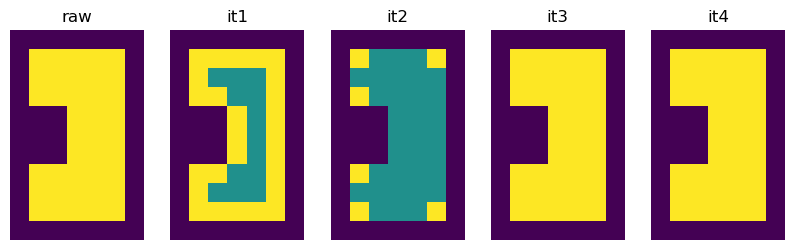

In [56]:
fig, axs = plt.subplots(1,5, figsize=(10,40))
axs[0].imshow(binary)
axs[0].set_title("raw")
axs[1].imshow(binary + it1)
axs[1].set_title("it1")
axs[2].imshow(binary + (it2))
axs[2].set_title("it2")
axs[3].imshow(binary + (it3))
axs[3].set_title("it3")
axs[4].imshow(binary + (it4))
axs[4].set_title("it4")
for ax in axs:
    ax.axis('off')
plt.show()

In [22]:
binary = np.asarray([
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
],
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
],
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
],
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
],
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
]]
)

In [23]:
t1 = skeleton(binary)
t2 = skeleton(binary-t1)
t3 = skeleton(binary-(t1+t2))

In [25]:
import napari

v = napari.Viewer(ndisplay=3)
v.add_image(binary, name="raw")
v.add_image(binary+t1, name="t1")
v.add_image(binary+(t1+t2), name="t2")
v.add_image(binary+(t1+t2+t3), name="t3")
napari.run()